## 03 scikit-learn中的回归问题

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [4]:
X.shape

(490, 13)

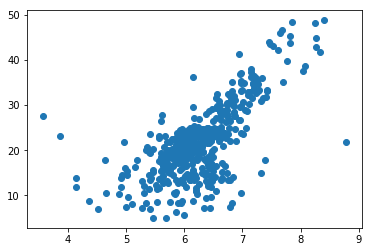

In [10]:
plt.scatter(X[:,5], y)
plt.show()

In [5]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

### scikit-learn中的线性回归

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lin_reg.coef_

array([ -1.18919477e-01,   3.63991462e-02,  -3.56494193e-02,
         5.66737830e-02,  -1.16195486e+01,   3.42022185e+00,
        -2.31470282e-02,  -1.19509560e+00,   2.59339091e-01,
        -1.40112724e-02,  -8.36521175e-01,   7.92283639e-03,
        -3.81966137e-01])

In [8]:
lin_reg.intercept_

34.161435496246924

In [9]:
lin_reg.score(X_test, y_test)

0.81298026026584758

### kNN Regressor

In [10]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train, y_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_standard, y_train)
knn_reg.score(X_test_standard, y_test)

0.84664511530389497

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1,6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train_standard, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [17]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [18]:
grid_search.best_score_

0.79917999890996905

In [20]:
grid_search.best_estimator_.score(X_test_standard, y_test)

0.88099665099417701